# Formula 1 Prediction Neural Network Model

1. Importing required csv files as dataframes

In [5]:
import pandas as pd
import numpy as np

In [6]:
results = pd.read_csv(r"C:\Users\TUF\Downloads\f1db_csv\results.csv")
races = pd.read_csv(r"C:\Users\TUF\Downloads\f1db_csv\races.csv")
quali = pd.read_csv(r"C:\Users\TUF\Downloads\f1db_csv\qualifying.csv")
drivers = pd.read_csv(r"C:\Users\TUF\Downloads\f1db_csv\drivers.csv")
constructors = pd.read_csv(r"C:\Users\TUF\Downloads\f1db_csv\constructors.csv")
circuit = pd.read_csv(r"C:\Users\TUF\Downloads\f1db_csv\circuits.csv")

2. Cleanizing Dataframes

In [7]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26759 non-null  int64  
 1   raceId           26759 non-null  int64  
 2   driverId         26759 non-null  int64  
 3   constructorId    26759 non-null  int64  
 4   number           26759 non-null  object 
 5   grid             26759 non-null  int64  
 6   position         26759 non-null  object 
 7   positionText     26759 non-null  object 
 8   positionOrder    26759 non-null  int64  
 9   points           26759 non-null  float64
 10  laps             26759 non-null  int64  
 11  time             26759 non-null  object 
 12  milliseconds     26759 non-null  object 
 13  fastestLap       26759 non-null  object 
 14  rank             26759 non-null  object 
 15  fastestLapTime   26759 non-null  object 
 16  fastestLapSpeed  26759 non-null  object 
 17  statusId    

In [8]:
results = results[~((results.isna()) | (results == 0)).all(axis=1)]
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26759 non-null  int64  
 1   raceId           26759 non-null  int64  
 2   driverId         26759 non-null  int64  
 3   constructorId    26759 non-null  int64  
 4   number           26759 non-null  object 
 5   grid             26759 non-null  int64  
 6   position         26759 non-null  object 
 7   positionText     26759 non-null  object 
 8   positionOrder    26759 non-null  int64  
 9   points           26759 non-null  float64
 10  laps             26759 non-null  int64  
 11  time             26759 non-null  object 
 12  milliseconds     26759 non-null  object 
 13  fastestLap       26759 non-null  object 
 14  rank             26759 non-null  object 
 15  fastestLapTime   26759 non-null  object 
 16  fastestLapSpeed  26759 non-null  object 
 17  statusId    

In [9]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1125 non-null   int64 
 1   year         1125 non-null   int64 
 2   round        1125 non-null   int64 
 3   circuitId    1125 non-null   int64 
 4   name         1125 non-null   object
 5   date         1125 non-null   object
 6   time         1125 non-null   object
 7   url          1125 non-null   object
 8   fp1_date     1125 non-null   object
 9   fp1_time     1125 non-null   object
 10  fp2_date     1125 non-null   object
 11  fp2_time     1125 non-null   object
 12  fp3_date     1125 non-null   object
 13  fp3_time     1125 non-null   object
 14  quali_date   1125 non-null   object
 15  quali_time   1125 non-null   object
 16  sprint_date  1125 non-null   object
 17  sprint_time  1125 non-null   object
 18  Unnamed: 18  1 non-null      object
dtypes: int64(4), object(15)
mem

In [10]:
races = races[~((races.isna()) | (races == 0)).all(axis=1)]
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1125 non-null   int64 
 1   year         1125 non-null   int64 
 2   round        1125 non-null   int64 
 3   circuitId    1125 non-null   int64 
 4   name         1125 non-null   object
 5   date         1125 non-null   object
 6   time         1125 non-null   object
 7   url          1125 non-null   object
 8   fp1_date     1125 non-null   object
 9   fp1_time     1125 non-null   object
 10  fp2_date     1125 non-null   object
 11  fp2_time     1125 non-null   object
 12  fp3_date     1125 non-null   object
 13  fp3_time     1125 non-null   object
 14  quali_date   1125 non-null   object
 15  quali_time   1125 non-null   object
 16  sprint_date  1125 non-null   object
 17  sprint_time  1125 non-null   object
 18  Unnamed: 18  1 non-null      object
dtypes: int64(4), object(15)
mem

In [11]:
quali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10494 entries, 0 to 10493
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      10494 non-null  int64 
 1   raceId         10494 non-null  int64 
 2   driverId       10494 non-null  int64 
 3   constructorId  10494 non-null  int64 
 4   number         10494 non-null  int64 
 5   position       10494 non-null  int64 
 6   q1             10494 non-null  object
 7   q2             10472 non-null  object
 8   q3             10448 non-null  object
dtypes: int64(6), object(3)
memory usage: 738.0+ KB


In [12]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   driverId     861 non-null    int64  
 1   driverRef    861 non-null    object 
 2   number       861 non-null    object 
 3   code         861 non-null    object 
 4   forename     861 non-null    object 
 5   surname      861 non-null    object 
 6   dob          861 non-null    object 
 7   nationality  861 non-null    object 
 8   url          861 non-null    object 
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  1 non-null      object 
dtypes: float64(8), int64(1), object(9)
memory usage: 1

In [13]:
drivers = drivers.drop(columns=[
    'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
    'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'
], errors='ignore')
drivers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     861 non-null    int64 
 1   driverRef    861 non-null    object
 2   number       861 non-null    object
 3   code         861 non-null    object
 4   forename     861 non-null    object
 5   surname      861 non-null    object
 6   dob          861 non-null    object
 7   nationality  861 non-null    object
 8   url          861 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.7+ KB


In [14]:
constructors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   212 non-null    int64 
 1   constructorRef  212 non-null    object
 2   name            212 non-null    object
 3   nationality     212 non-null    object
 4   url             212 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [15]:
circuit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
 8   url         77 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 5.5+ KB


In [16]:
circuit = circuit.drop(columns=[
    'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 
], errors='ignore')
circuit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   circuitId   77 non-null     int64 
 1   circuitRef  77 non-null     object
 2   name        77 non-null     object
 3   location    77 non-null     object
 4   country     77 non-null     object
 5   url         77 non-null     object
dtypes: int64(1), object(5)
memory usage: 3.7+ KB


3. Merging the dataframes

In [17]:
df1 = pd.merge(races,results,how='inner',on=['raceId'])
df2 = pd.merge(df1,quali,how='inner',on=['raceId','driverId','constructorId'])
df3 = pd.merge(df2,drivers,how='inner',on=['driverId'])
df4 = pd.merge(df3,constructors,how='inner',on=['constructorId'])
df5 = pd.merge(df4,circuit,how='inner',on=['circuitId'], suffixes=('_driver', '_circuit'))

In [18]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10484 entries, 0 to 10483
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           10484 non-null  int64  
 1   year             10484 non-null  int64  
 2   round            10484 non-null  int64  
 3   circuitId        10484 non-null  int64  
 4   name_x           10484 non-null  object 
 5   date             10484 non-null  object 
 6   time_x           10484 non-null  object 
 7   url_x            10484 non-null  object 
 8   fp1_date         10484 non-null  object 
 9   fp1_time         10484 non-null  object 
 10  fp2_date         10484 non-null  object 
 11  fp2_time         10484 non-null  object 
 12  fp3_date         10484 non-null  object 
 13  fp3_time         10484 non-null  object 
 14  quali_date       10484 non-null  object 
 15  quali_time       10484 non-null  object 
 16  sprint_date      10484 non-null  object 
 17  sprint_time 

4. Dropping unnecessary columns

In [19]:
df5 = df5.drop([
    'round', 'circuitId', 'time_x', 'url_x', 'resultId', 'driverId',
    'constructorId', 'number_x', 'positionText', 'position_x',
    'positionOrder', 'laps', 'time_y', 'rank', 'fastestLapTime',
    'fastestLapSpeed', 'qualifyId', 'driverRef', 'number', 'code',
    'url_y', 'circuitRef', 'location', 'Unnamed: 18',
    'number_y', 'points', 'constructorRef', 'name_x', 'raceId',
    'fastestLap', 'q2', 'q3', 'milliseconds', 'q1'
], axis=1,errors='ignore')

In [20]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10484 entries, 0 to 10483
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           10484 non-null  int64 
 1   date           10484 non-null  object
 2   fp1_date       10484 non-null  object
 3   fp1_time       10484 non-null  object
 4   fp2_date       10484 non-null  object
 5   fp2_time       10484 non-null  object
 6   fp3_date       10484 non-null  object
 7   fp3_time       10484 non-null  object
 8   quali_date     10484 non-null  object
 9   quali_time     10484 non-null  object
 10  sprint_date    10484 non-null  object
 11  sprint_time    10484 non-null  object
 12  grid           10484 non-null  int64 
 13  statusId       10484 non-null  int64 
 14  position_y     10484 non-null  int64 
 15  forename       10484 non-null  object
 16  surname        10484 non-null  object
 17  dob            10484 non-null  object
 18  nationality_x  10484 non-n

In [21]:
df5

,year,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,...,forename,surname,dob,nationality_x,name_y,nationality_y,url_driver,name,country,url_circuit
0,2009,29-03-2009,\N,\N,\N,\N,\N,\N,\N,\N,...,Jenson,Button,19-01-1980,British,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2009,29-03-2009,\N,\N,\N,\N,\N,\N,\N,\N,...,Rubens,Barrichello,23-05-1972,Brazilian,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,2009,29-03-2009,\N,\N,\N,\N,\N,\N,\N,\N,...,Jarno,Trulli,13-07-1974,Italian,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,2009,29-03-2009,\N,\N,\N,\N,\N,\N,\N,\N,...,Timo,Glock,18-03-1982,German,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,2009,29-03-2009,\N,\N,\N,\N,\N,\N,\N,\N,...,Fernando,Alonso,29-07-1981,Spanish,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10479,2024,08-12-2024,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,Kevin,Magnussen,05-10-1992,Danish,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit
10480,2024,08-12-2024,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,Liam,Lawson,11-02-2002,New Zealander,RB F1 Team,Italian,http://en.wikipedia.org/wiki/RB_Formula_One_Team,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit
10481,2024,08-12-2024,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,Valtteri,Bottas,28-08-1989,Finnish,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber_Motorsport,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit
10482,2024,08-12-2024,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,Franco,Colapinto,27-05-2003,Argentinian,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit


5. Considering Data from 2018

In [22]:
data = df5[df5['year']>=2018]
data

,year,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,...,forename,surname,dob,nationality_x,name_y,nationality_y,url_driver,name,country,url_circuit
7508,2018,25-03-2018,\N,\N,\N,\N,\N,\N,\N,\N,...,Sebastian,Vettel,03-07-1987,German,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
7509,2018,25-03-2018,\N,\N,\N,\N,\N,\N,\N,\N,...,Lewis,Hamilton,07-01-1985,British,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
7510,2018,25-03-2018,\N,\N,\N,\N,\N,\N,\N,\N,...,Kimi,Räikkönen,17-10-1979,Finnish,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
7511,2018,25-03-2018,\N,\N,\N,\N,\N,\N,\N,\N,...,Daniel,Ricciardo,01-07-1989,Australian,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
7512,2018,25-03-2018,\N,\N,\N,\N,\N,\N,\N,\N,...,Fernando,Alonso,29-07-1981,Spanish,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10479,2024,08-12-2024,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,Kevin,Magnussen,05-10-1992,Danish,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit
10480,2024,08-12-2024,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,Liam,Lawson,11-02-2002,New Zealander,RB F1 Team,Italian,http://en.wikipedia.org/wiki/RB_Formula_One_Team,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit
10481,2024,08-12-2024,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,Valtteri,Bottas,28-08-1989,Finnish,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber_Motorsport,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit
10482,2024,08-12-2024,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,Franco,Colapinto,27-05-2003,Argentinian,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit


6. Feature engineering

6.1.  Renaming the columns

In [23]:

data.rename(columns={'name':'GP_name','position_y':'position','grid':'quali_pos','name_y':'constructor','nationality_x':'driver_nationality','nationality_y':'constructor_nationality'},inplace=True)
data['driver'] = data['forename']+' '+data['surname']
data['date'] = pd.to_datetime(data['date'])
data['dob'] = pd.to_datetime(data['dob'], dayfirst=True, errors='coerce')

C:\Users\TUF\AppData\Local\Temp\ipykernel_26316\1806203746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'name':'GP_name','position_y':'position','grid':'quali_pos','name_y':'constructor','nationality_x':'driver_nationality','nationality_y':'constructor_nationality'},inplace=True)
C:\Users\TUF\AppData\Local\Temp\ipykernel_26316\1806203746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['driver'] = data['forename']+' '+data['surname']
C:\Users\TUF\AppData\Local\Temp\ipykernel_26316\1806203746.py:3: UserWarning: Parsing dates in 

In [24]:
data

,year,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,...,surname,dob,driver_nationality,constructor,constructor_nationality,url_driver,GP_name,country,url_circuit,driver
7508,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,Vettel,1987-07-03,German,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Sebastian Vettel
7509,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,Hamilton,1985-01-07,British,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Lewis Hamilton
7510,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,Räikkönen,1979-10-17,Finnish,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Kimi Räikkönen
7511,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,Ricciardo,1989-07-01,Australian,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Daniel Ricciardo
7512,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,Alonso,1981-07-29,Spanish,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Fernando Alonso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10479,2024,2024-12-08,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,Magnussen,1992-10-05,Danish,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit,Kevin Magnussen
10480,2024,2024-12-08,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,Lawson,2002-02-11,New Zealander,RB F1 Team,Italian,http://en.wikipedia.org/wiki/RB_Formula_One_Team,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit,Liam Lawson
10481,2024,2024-12-08,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,Bottas,1989-08-28,Finnish,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber_Motorsport,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit,Valtteri Bottas
10482,2024,2024-12-08,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,Colapinto,2003-05-27,Argentinian,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit,Franco Colapinto


6.2 Creating a driver age parameter

In [25]:
data['age_at_gp_in_days'] = abs(data['dob']-data['date'])
data['age_at_gp_in_days'] = data['age_at_gp_in_days'].apply(lambda x: str(x).split(' ')[0])

C:\Users\TUF\AppData\Local\Temp\ipykernel_26316\1540702782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_at_gp_in_days'] = abs(data['dob']-data['date'])
C:\Users\TUF\AppData\Local\Temp\ipykernel_26316\1540702782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_at_gp_in_days'] = data['age_at_gp_in_days'].apply(lambda x: str(x).split(' ')[0])


In [26]:
data

,year,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,...,dob,driver_nationality,constructor,constructor_nationality,url_driver,GP_name,country,url_circuit,driver,age_at_gp_in_days
7508,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,1987-07-03,German,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Sebastian Vettel,11223
7509,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,1985-01-07,British,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Lewis Hamilton,12130
7510,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,1979-10-17,Finnish,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Kimi Räikkönen,14039
7511,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,1989-07-01,Australian,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Daniel Ricciardo,10494
7512,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,1981-07-29,Spanish,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Fernando Alonso,13388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10479,2024,2024-12-08,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,1992-10-05,Danish,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit,Kevin Magnussen,11752
10480,2024,2024-12-08,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,2002-02-11,New Zealander,RB F1 Team,Italian,http://en.wikipedia.org/wiki/RB_Formula_One_Team,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit,Liam Lawson,8336
10481,2024,2024-12-08,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,1989-08-28,Finnish,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber_Motorsport,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit,Valtteri Bottas,12886
10482,2024,2024-12-08,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,2003-05-27,Argentinian,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit,Franco Colapinto,7866


6.3 Some of the constructors changed their name over the year so replacing old names with current name

In [27]:
data['constructor'] = data['constructor'].apply(lambda x: 'Racing Point' if x=='Force India' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Racing Point' if x=='Aston Martin' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Alfa Romeo' if x=='Sauber' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Renault' if x=='Lotus F1' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Renault' if x=='Alpine' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'AlphaTauri' if x=='Toro Rosso' else x)

C:\Users\TUF\AppData\Local\Temp\ipykernel_26316\2726397071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['constructor'] = data['constructor'].apply(lambda x: 'Racing Point' if x=='Force India' else x)
C:\Users\TUF\AppData\Local\Temp\ipykernel_26316\2726397071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['constructor'] = data['constructor'].apply(lambda x: 'Racing Point' if x=='Aston Martin' else x)
C:\Users\TUF\AppData\Local\Temp\ipykernel_26316\2726397071.py:3: SettingWithCopyWarning

In [28]:
data['driver_nationality'] = data['driver_nationality'].apply(lambda x: str(x)[:3])
data['constructor_nationality'] = data['constructor_nationality'].apply(lambda x: str(x)[:3])
data['country'] = data['country'].apply(lambda x: 'Bri' if x=='UK' else x)
data['country'] = data['country'].apply(lambda x: 'Ame' if x=='USA' else x)
data['country'] = data['country'].apply(lambda x: 'Fre' if x=='Fra' else x)
data['country'] = data['country'].apply(lambda x: str(x)[:3])
data['driver_home'] = data['driver_nationality'] == data['country']
data['constructor_home'] = data['constructor_nationality'] == data['country']
data['driver_home'] = data['driver_home'].apply(lambda x: int(x))
data['constructor_home'] = data['constructor_home'].apply(lambda x: int(x))

C:\Users\TUF\AppData\Local\Temp\ipykernel_26316\1210236109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['driver_nationality'] = data['driver_nationality'].apply(lambda x: str(x)[:3])
C:\Users\TUF\AppData\Local\Temp\ipykernel_26316\1210236109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['constructor_nationality'] = data['constructor_nationality'].apply(lambda x: str(x)[:3])
C:\Users\TUF\AppData\Local\Temp\ipykernel_26316\1210236109.py:3: SettingWithCopyWarning: 
A value is trying to b

6.4 reasons for DNF(did not finish)

In [29]:
data['driver_dnf'] = data['statusId'].apply(lambda x: 1 if x in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137] else 0)
data['constructor_dnf'] = data['statusId'].apply(lambda x: 1 if x not in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137,1] else 0)
data.drop(['forename','surname'],axis=1,inplace=True)

C:\Users\TUF\AppData\Local\Temp\ipykernel_26316\506151239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['driver_dnf'] = data['statusId'].apply(lambda x: 1 if x in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137] else 0)
C:\Users\TUF\AppData\Local\Temp\ipykernel_26316\506151239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['constructor_dnf'] = data['statusId'].apply(lambda x: 1 if x not in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137,1] else 0)
C:\Users\TUF\AppData\Local\Temp\ipykern

In [30]:
data

,year,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,...,url_driver,GP_name,country,url_circuit,driver,age_at_gp_in_days,driver_home,constructor_home,driver_dnf,constructor_dnf
7508,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Albert Park Grand Prix Circuit,Aus,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Sebastian Vettel,11223,0,0,0,0
7509,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,Albert Park Grand Prix Circuit,Aus,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Lewis Hamilton,12130,0,0,0,0
7510,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Albert Park Grand Prix Circuit,Aus,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Kimi Räikkönen,14039,0,0,0,0
7511,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,Albert Park Grand Prix Circuit,Aus,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Daniel Ricciardo,10494,1,1,0,0
7512,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,http://en.wikipedia.org/wiki/McLaren,Albert Park Grand Prix Circuit,Aus,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Fernando Alonso,13388,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10479,2024,2024-12-08,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,http://en.wikipedia.org/wiki/Haas_F1_Team,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit,Kevin Magnussen,11752,0,0,0,1
10480,2024,2024-12-08,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,http://en.wikipedia.org/wiki/RB_Formula_One_Team,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit,Liam Lawson,8336,0,0,0,1
10481,2024,2024-12-08,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,http://en.wikipedia.org/wiki/Sauber_Motorsport,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit,Valtteri Bottas,12886,0,0,1,0
10482,2024,2024-12-08,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Yas Marina Circuit,UAE,http://en.wikipedia.org/wiki/Yas_Marina_Circuit,Franco Colapinto,7866,0,0,0,1


7. Data Visualization

In [35]:
font = {
    'family':'serif',
    'color':'black',
    'weight':'bold',
    'size':18
}

7.1 Ploting DNF by driver

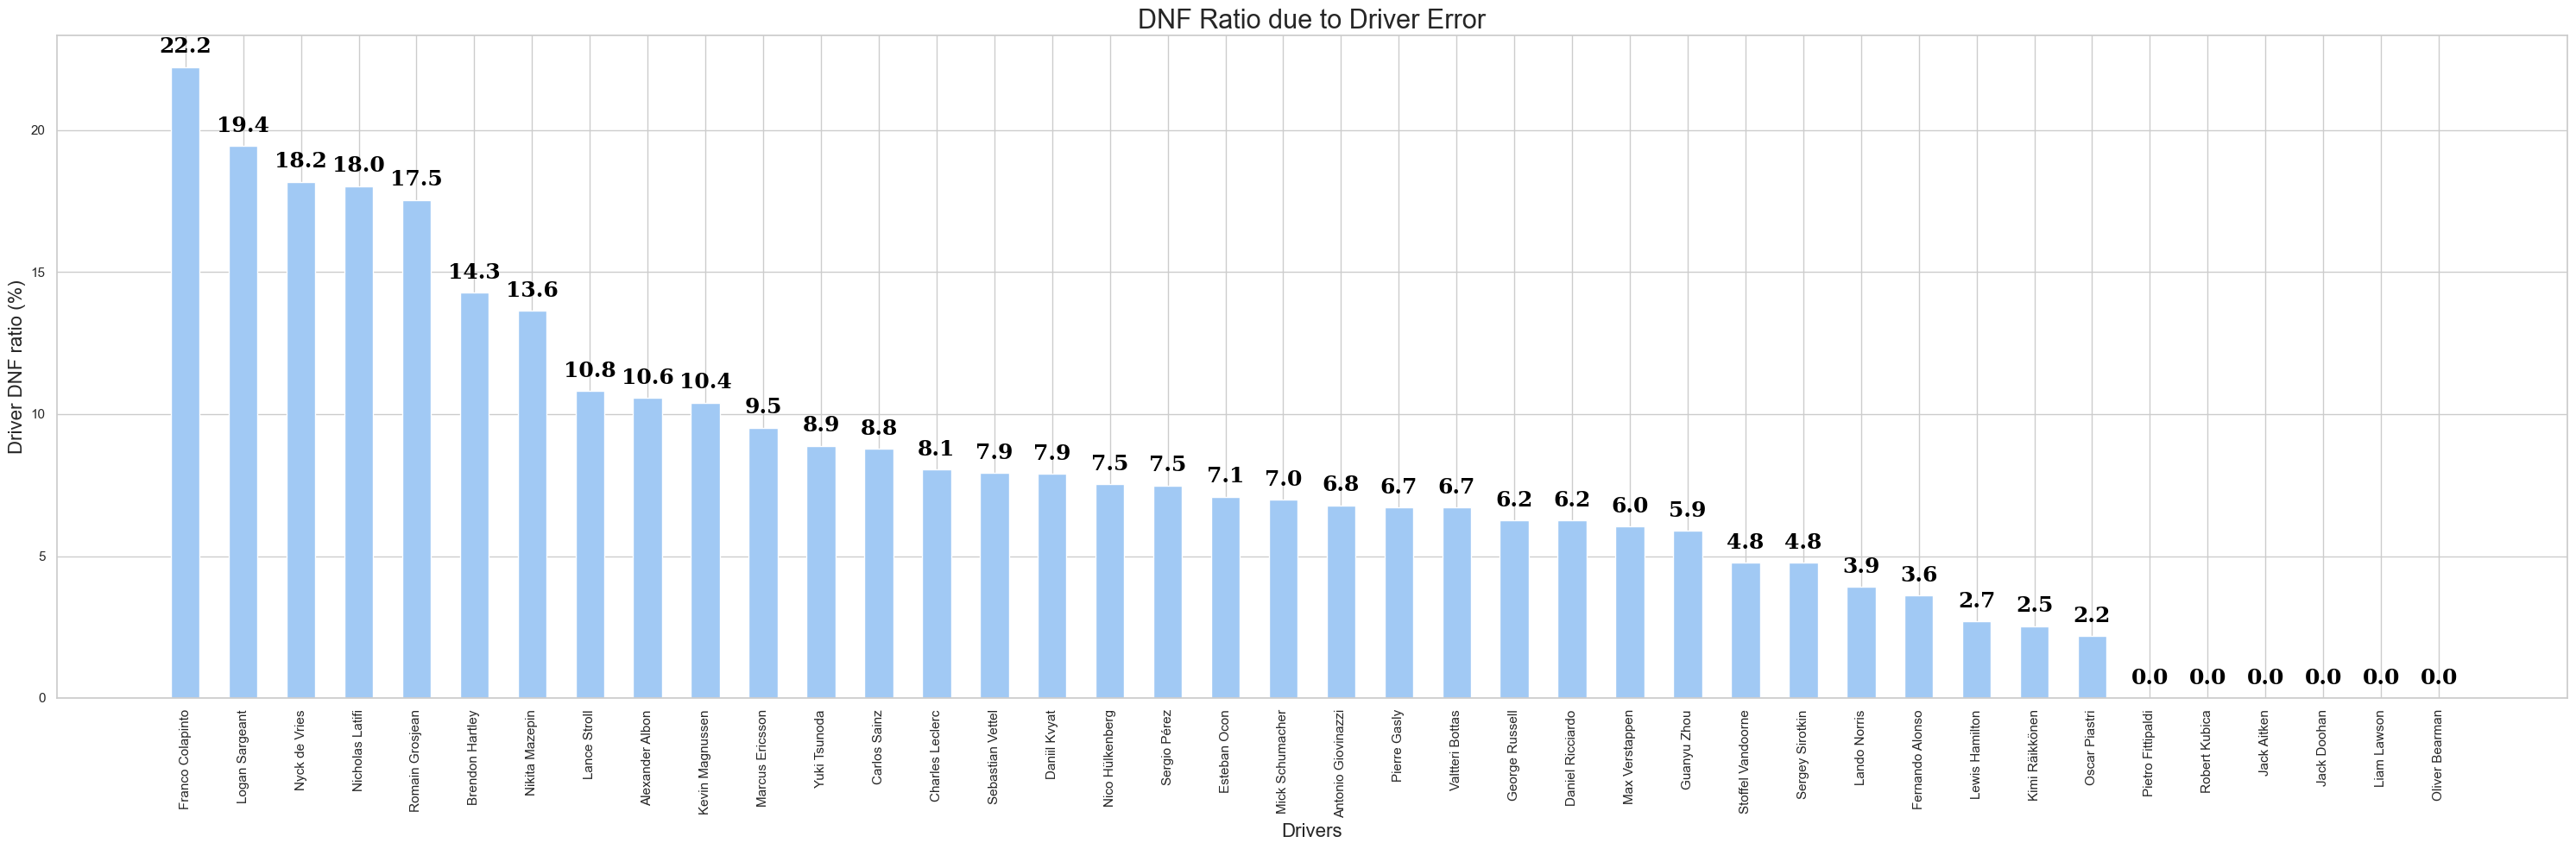

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

dnf_by_driver = data.groupby('driver')['driver_dnf'].sum()
driver_race_entered = data.groupby('driver')['driver_dnf'].count()
driver_dnf_ratio = (dnf_by_driver * 100 / driver_race_entered).sort_values(ascending=False)
sns.set_theme(style='whitegrid', palette='pastel')
plt.figure(figsize=(30, 10))
bars = plt.bar(x=driver_dnf_ratio.index, height=driver_dnf_ratio, align='center', width=0.5)

plt.xticks(rotation=90)
plt.xlabel('Drivers',fontsize=16)
plt.ylabel('Driver DNF ratio (%)',fontsize=16)
plt.title('DNF Ratio due to Driver Error',fontsize=22)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{round(yval, 1)}', 
             ha='center', fontdict=font)

plt.tight_layout()
plt.show()


7.2 Ploting DNF by constructor

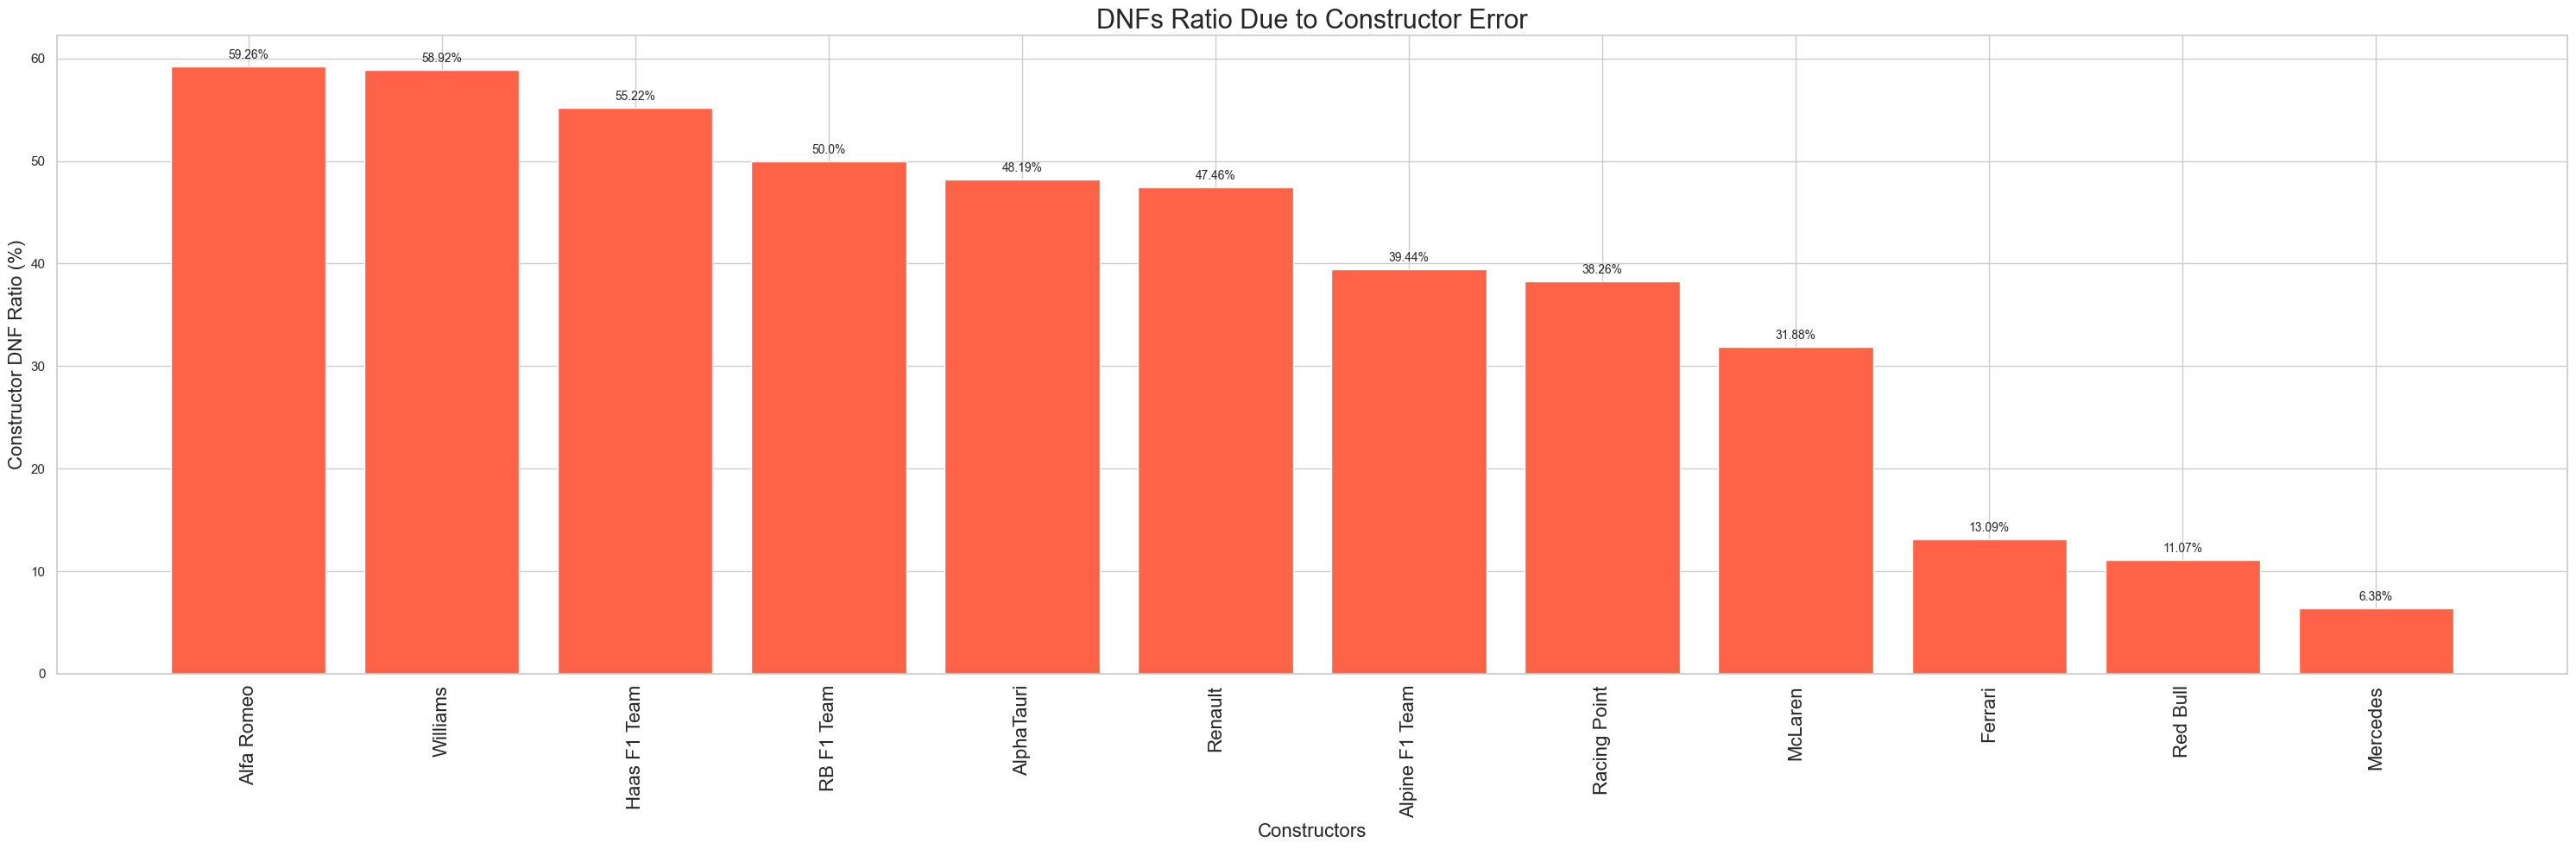

In [41]:
dnf_by_constructor = data.groupby('constructor')['constructor_dnf'].sum()
constructor_race_entered = data.groupby('constructor')['constructor_dnf'].count()
constructor_dnf_ratio = (dnf_by_constructor * 100 / constructor_race_entered).sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(30, 10))

bars = plt.bar(x=constructor_dnf_ratio.index, height=constructor_dnf_ratio, align='center', width=0.8, color='tomato')

plt.xticks(rotation=90, fontsize=16)
plt.xlabel('Constructors', fontsize=16)
plt.ylabel('Constructor DNF Ratio (%)', fontsize=16)
plt.title('DNFs Ratio Due to Constructor Error', fontsize=22)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{round(yval, 2)}%', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


7.3 Ploting Driver Point-Finish % at Home Races

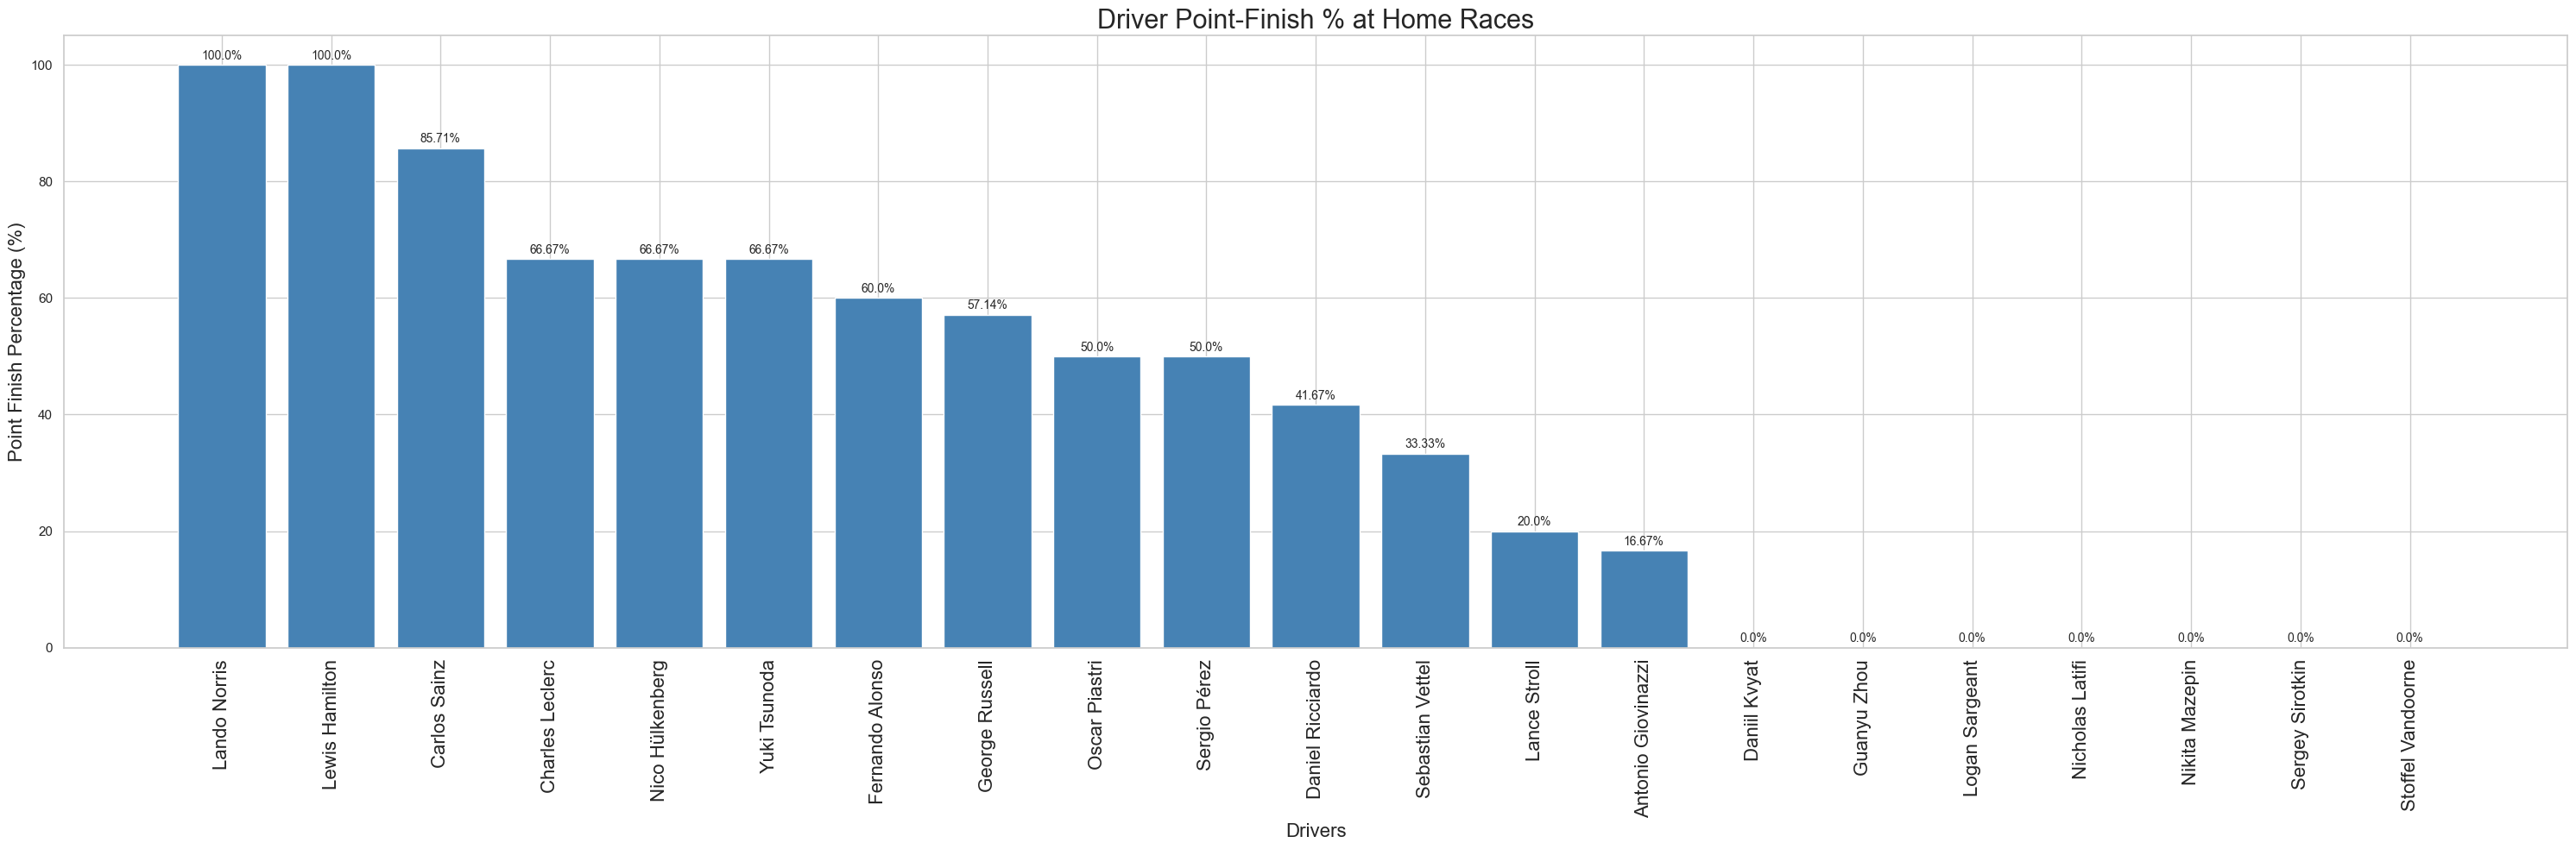

In [42]:
# Calculate point finishes at home races
driver_home_points_finish = data.loc[
    (data['position'] < 11) & (data['driver_home'] == 1)
].groupby('driver')['position'].count()

# Total home races per driver
total_home_races = data[data['driver_home'] == 1].groupby('driver')['driver_home'].sum()

# Ratio calculation
driver_home_point_finish_ratio = (
    driver_home_points_finish * 100 / total_home_races
).sort_values(ascending=False).fillna(0)

sns.set(style="whitegrid")
plt.figure(figsize=(30, 10))
bars = plt.bar(
    x=driver_home_point_finish_ratio.index,
    height=driver_home_point_finish_ratio,
    align='center',
    width=0.8,
    color='steelblue'
)

plt.xticks(rotation=90, fontsize=16)
plt.xlabel('Drivers', fontsize=16)
plt.ylabel('Point Finish Percentage (%)', fontsize=16)
plt.title('Driver Point-Finish % at Home Races', fontsize=22)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.5,
        f'{round(yval, 2)}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


7.4 Ploting Constructor Point-Finish % at Home Races

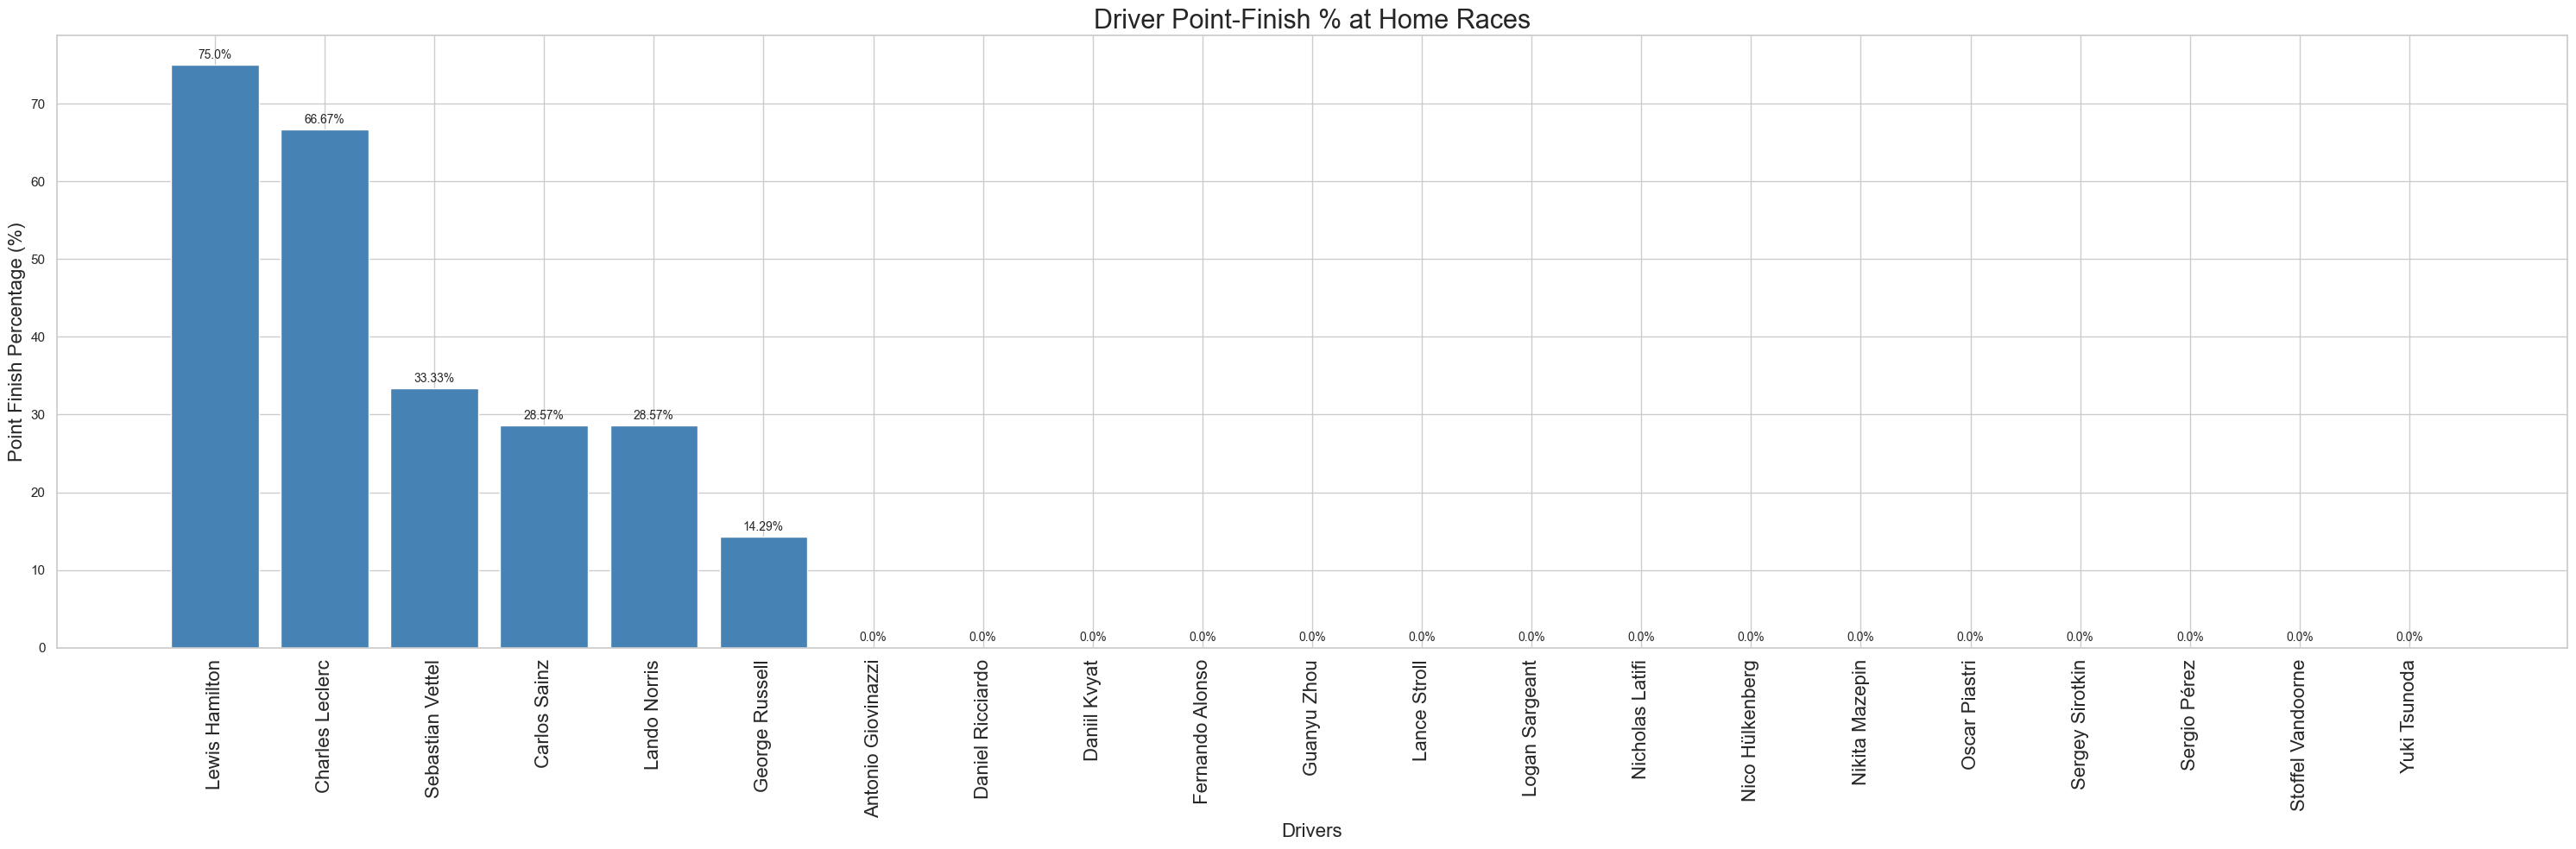

In [43]:
# Calculate point finishes at home races
driver_home_points_finish = data.loc[
    (data['position'] < 4) & (data['driver_home'] == 1)
].groupby('driver')['position'].count()

# Total home races per driver
total_home_races = data[data['driver_home'] == 1].groupby('driver')['driver_home'].sum()

# Ratio calculation
driver_home_point_finish_ratio = (
    driver_home_points_finish * 100 / total_home_races
).sort_values(ascending=False).fillna(0)

sns.set(style="whitegrid")
plt.figure(figsize=(30, 10))
bars = plt.bar(
    x=driver_home_point_finish_ratio.index,
    height=driver_home_point_finish_ratio,
    align='center',
    width=0.8,
    color='steelblue'
)

plt.xticks(rotation=90, fontsize=16)
plt.xlabel('Drivers', fontsize=16)
plt.ylabel('Point Finish Percentage (%)', fontsize=16)
plt.title('Driver Point-Finish % at Home Races', fontsize=22)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.5,
        f'{round(yval, 2)}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


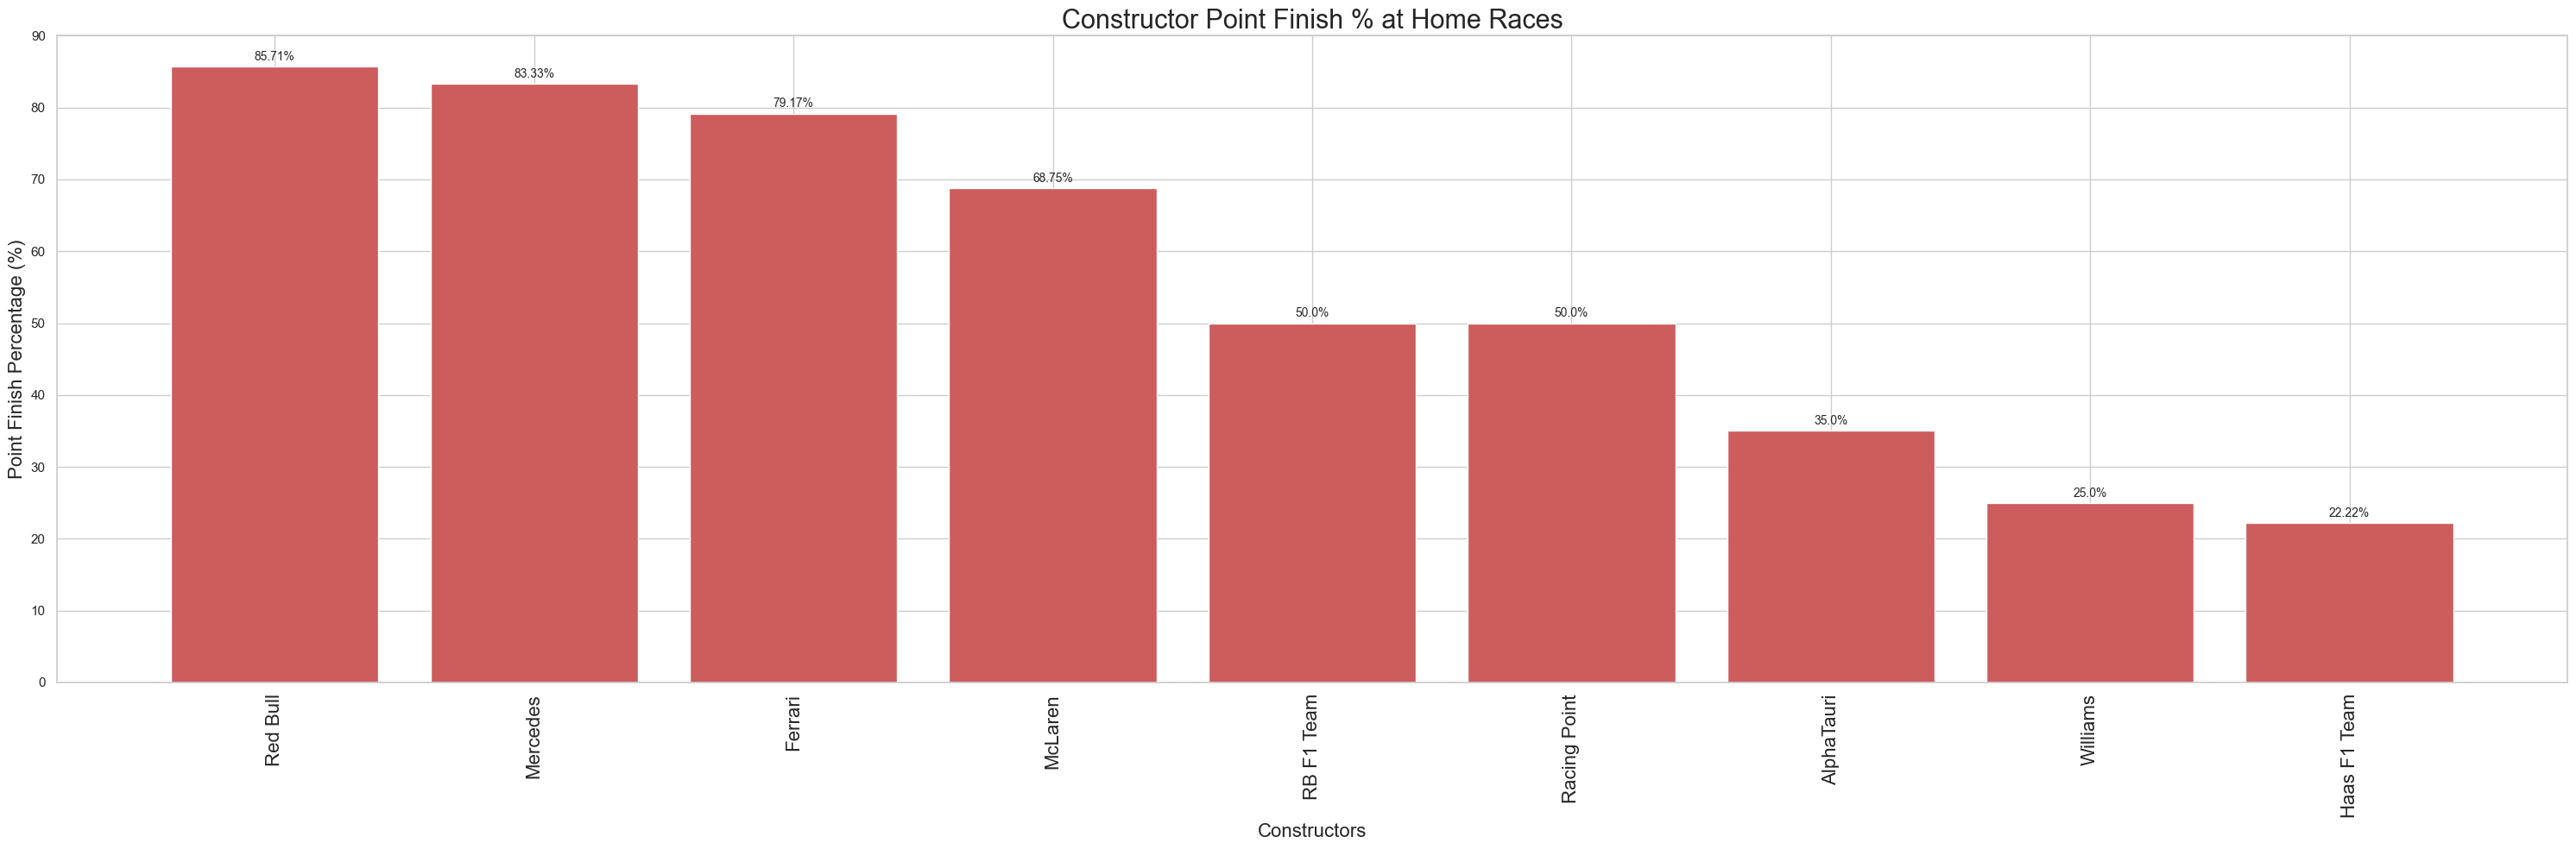

In [44]:
# Calculate point finishes (position < 11) in constructor home races
constructor_home_points_finish = data.loc[
    (data['position'] < 11) & (data['constructor_home'] == 1)
].groupby('constructor')['position'].count()

# Total home races for each constructor
total_home_races = data[data['constructor_home'] == 1].groupby('constructor')['constructor_home'].sum()

# Ratio of home point finishes
constructor_home_point_finish_ratio = (
    constructor_home_points_finish * 100 / total_home_races
).sort_values(ascending=False).fillna(0)

sns.set(style="whitegrid")
plt.figure(figsize=(30, 10))
bars = plt.bar(
    x=constructor_home_point_finish_ratio.index,
    height=constructor_home_point_finish_ratio,
    align='center',
    width=0.8,
    color='indianred'
)

plt.xticks(rotation=90, fontsize=16)
plt.xlabel('Constructors', fontsize=16)
plt.ylabel('Point Finish Percentage (%)', fontsize=16)
plt.title('Constructor Point Finish % at Home Races', fontsize=22)


for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.5,
        f'{round(yval, 2)}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


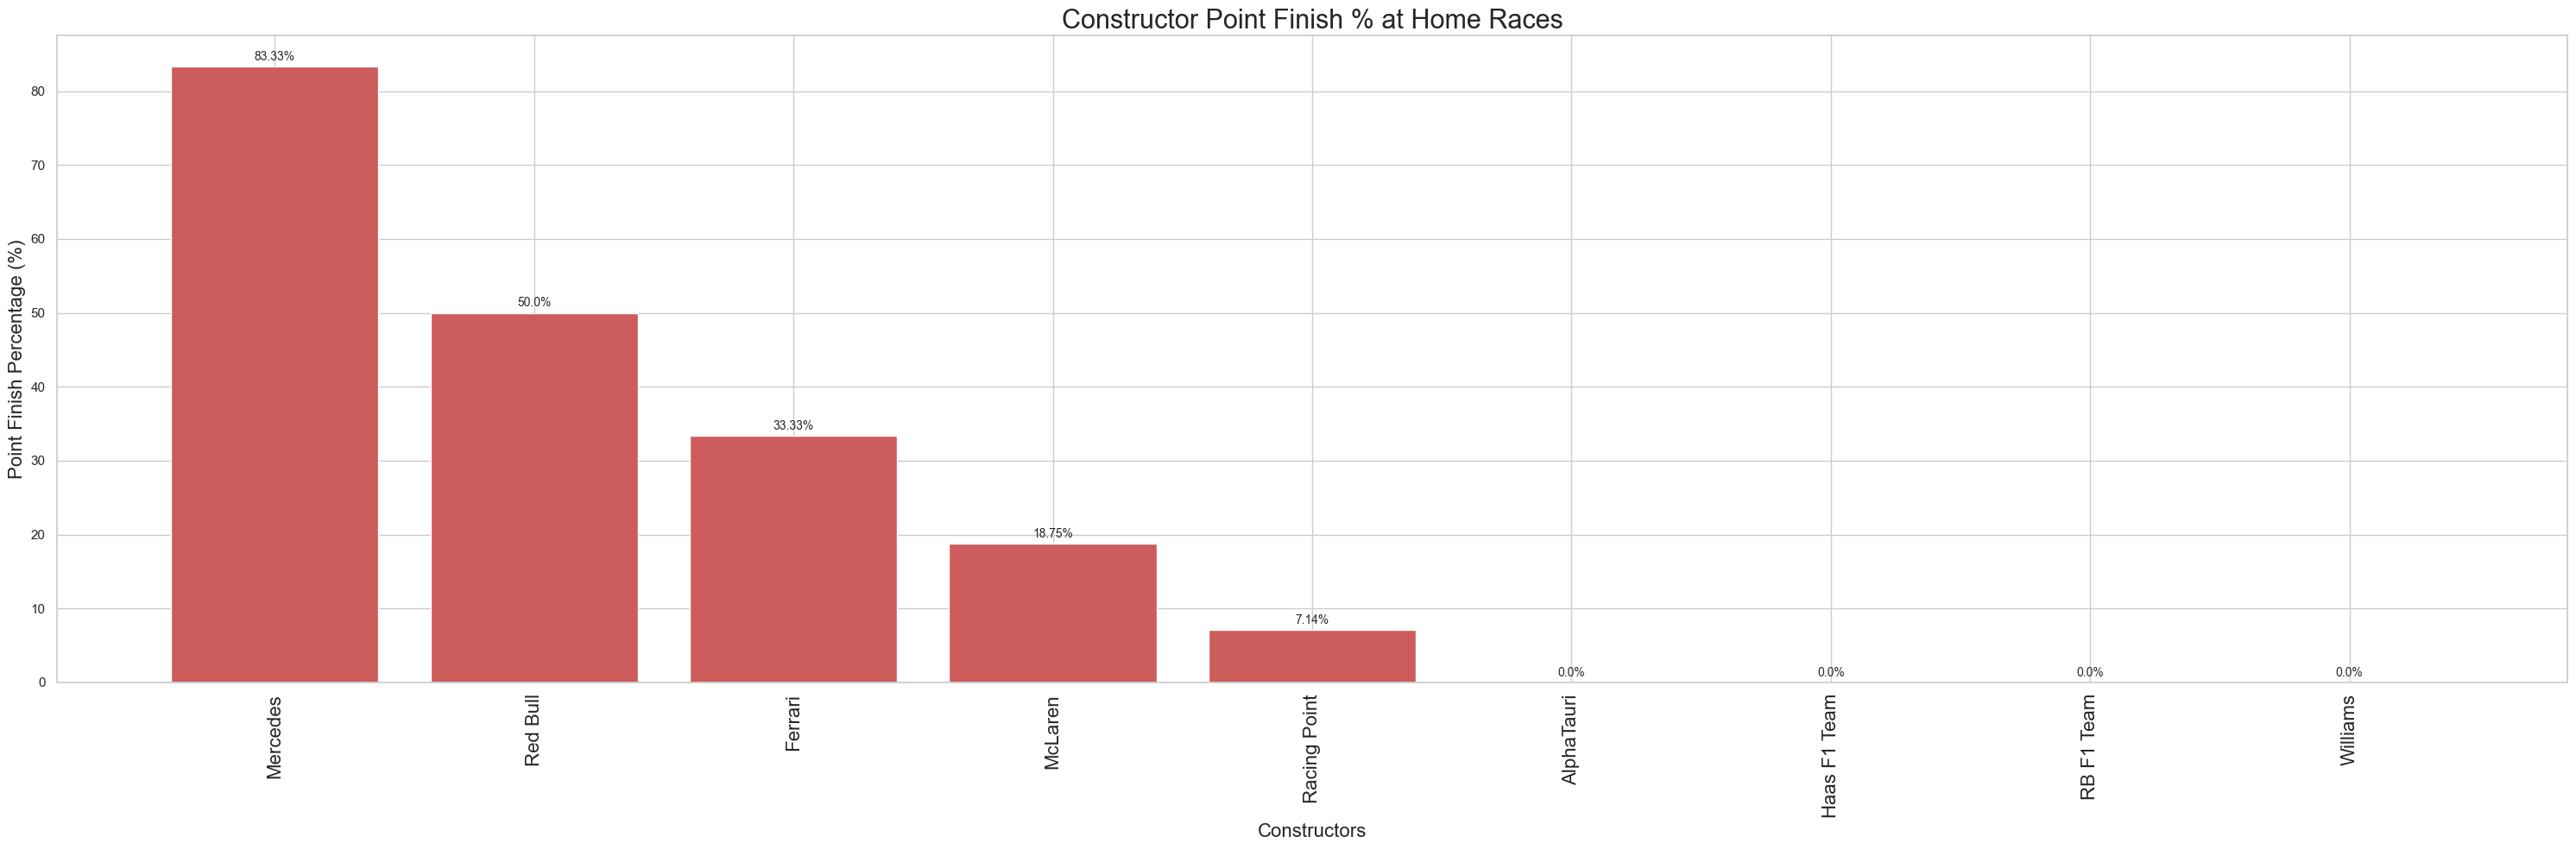

In [45]:

# Calculate point finishes (position < 11) in constructor home races
constructor_home_points_finish = data.loc[
    (data['position'] < 4) & (data['constructor_home'] == 1)
].groupby('constructor')['position'].count()

# Total home races for each constructor
total_home_races = data[data['constructor_home'] == 1].groupby('constructor')['constructor_home'].sum()

# Ratio of home point finishes
constructor_home_point_finish_ratio = (
    constructor_home_points_finish * 100 / total_home_races
).sort_values(ascending=False).fillna(0)

sns.set(style="whitegrid")
plt.figure(figsize=(30, 10))
bars = plt.bar(
    x=constructor_home_point_finish_ratio.index,
    height=constructor_home_point_finish_ratio,
    align='center',
    width=0.8,
    color='indianred'
)

plt.xticks(rotation=90, fontsize=16)
plt.xlabel('Constructors', fontsize=16)
plt.ylabel('Point Finish Percentage (%)', fontsize=16)
plt.title('Constructor Point Finish % at Home Races', fontsize=22)


for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.5,
        f'{round(yval, 2)}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


7.5 Ploting DNF Ratio due to Driver Error

C:\Users\TUF\AppData\Local\Temp\ipykernel_26316\1570268767.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=dnf_data, x='driver', y='dnf_ratio', palette='rocket')
C:\Users\TUF\AppData\Local\Temp\ipykernel_26316\1570268767.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


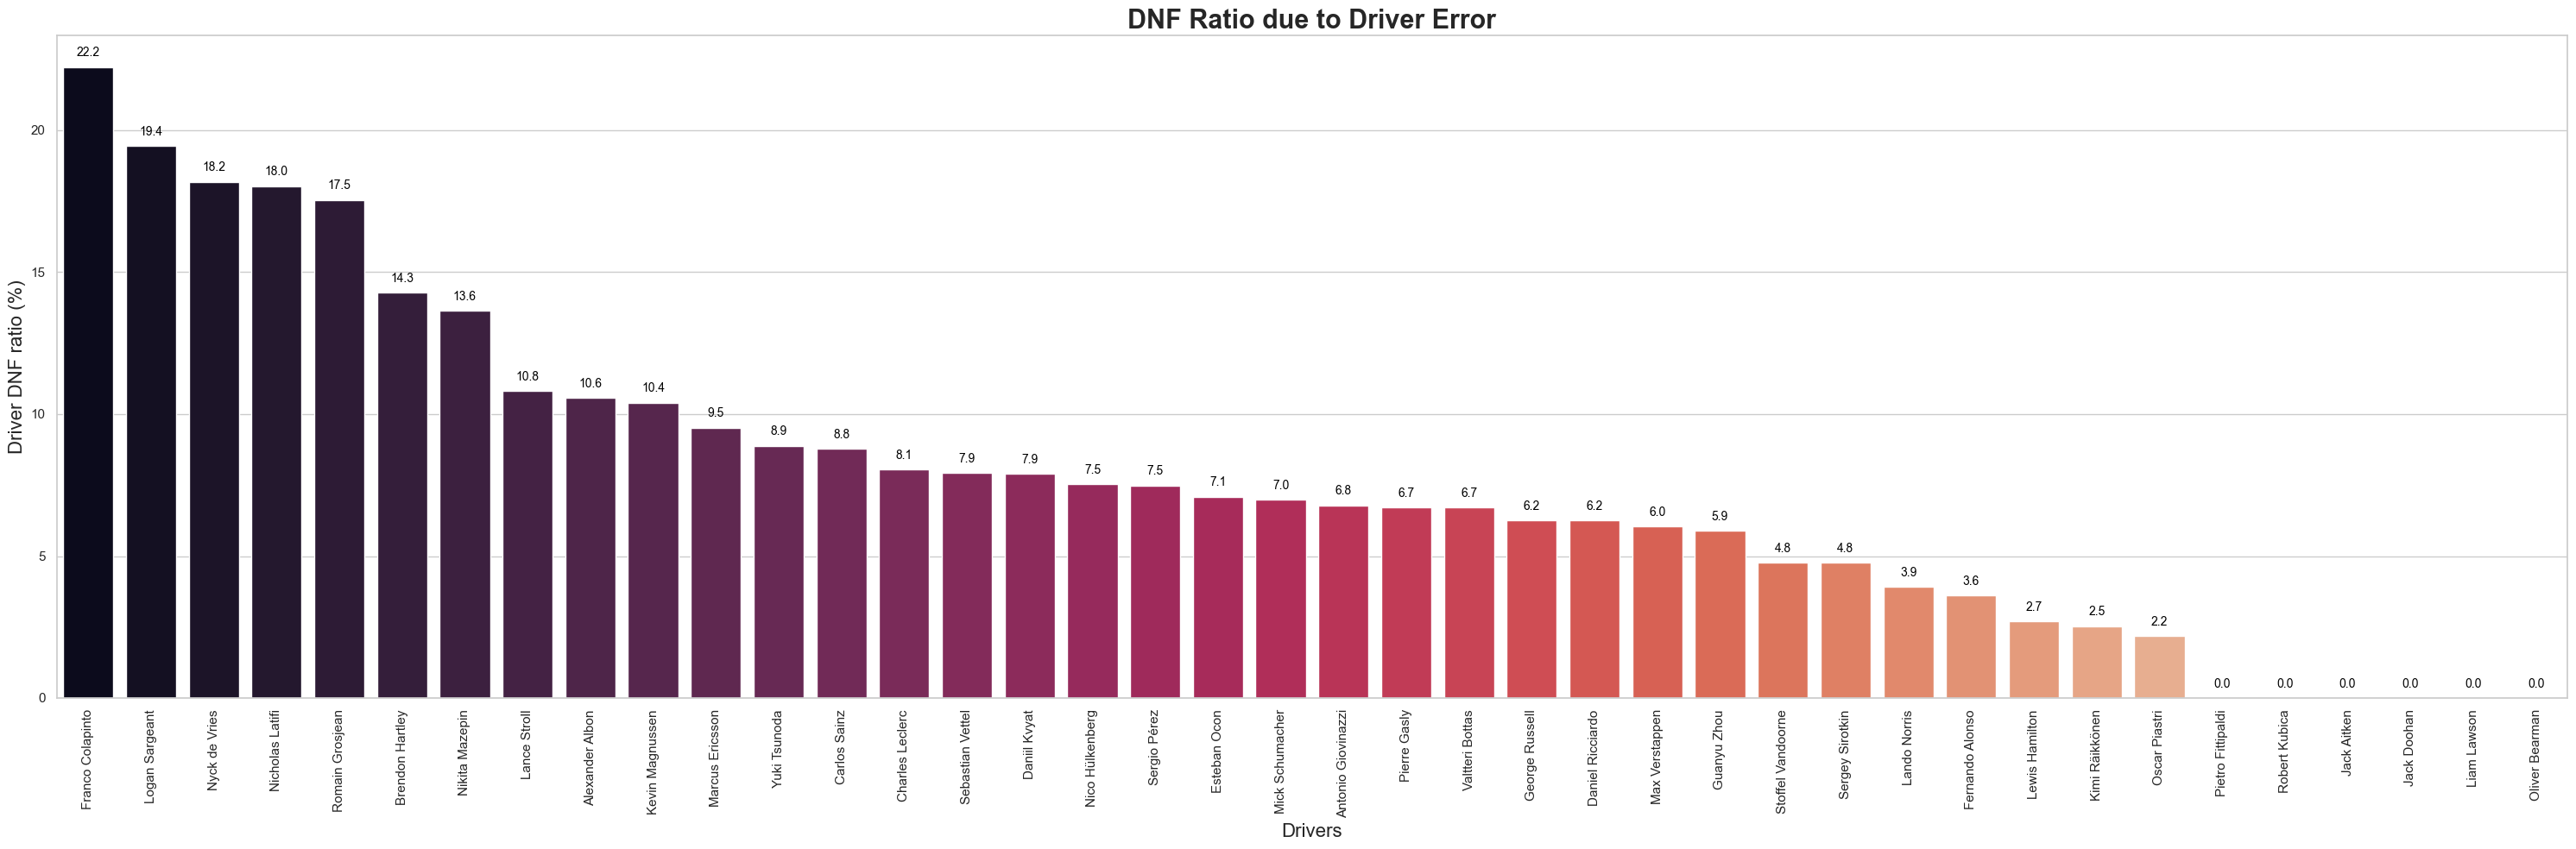

In [46]:
sns.set_theme(style='whitegrid', palette='pastel') 

# Prepare data for seaborn
dnf_data = pd.DataFrame({
    'driver': driver_dnf_ratio.index,
    'dnf_ratio': driver_dnf_ratio.values
})

# Sort if needed
dnf_data = dnf_data.sort_values('dnf_ratio', ascending=False)

plt.figure(figsize=(30, 10))
ax = sns.barplot(data=dnf_data, x='driver', y='dnf_ratio', palette='rocket')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set labels and title
ax.set_xlabel('Drivers', fontsize=16)
ax.set_ylabel('Driver DNF ratio (%)', fontsize=16)
ax.set_title('DNF Ratio due to Driver Error', fontsize=22, fontweight='bold')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',
                (p.get_x() + p.get_width() / 2., height + 0.5),
                ha='center', va='center',
                fontsize=10,
                color='black')

plt.tight_layout()
plt.show()


8. Classification

In [47]:
# Calculate DNF ratio and driver confidence
dnf_by_driver = data.groupby('driver')['driver_dnf'].sum()
driver_race_entered = data.groupby('driver')['driver_dnf'].count()
driver_dnf_ratio = dnf_by_driver / driver_race_entered
driver_confidence = 1 - driver_dnf_ratio

# Convert to dictionary
driver_confidence_dict = dict(zip(driver_confidence.index, driver_confidence))


In [48]:
# Count total DNFs per constructor
dnf_by_constructor = data.groupby('constructor')['constructor_dnf'].sum()

# Count total races per constructor
constructor_race_entered = data.groupby('constructor')['constructor_dnf'].count()

# Compute reliability
constructor_dnf_ratio = dnf_by_constructor / constructor_race_entered
constructor_reliability = 1 - constructor_dnf_ratio

# Save as dictionary
constructor_reliability_dict = dict(zip(constructor_reliability.index, constructor_reliability))


In [49]:
# Add driver confidence and constructor reliability
data['driver_confidence'] = data['driver'].apply(lambda x: driver_confidence_dict[x])
data['constructor_reliability'] = data['constructor'].apply(lambda x: constructor_reliability_dict[x])

# Define active drivers and constructors
active_constructors = ['Renault', 'Williams', 'McLaren', 'Ferrari', 'Mercedes',
                       'AlphaTauri', 'Racing Point', 'Alfa Romeo', 'Red Bull',
                       'Haas F1 Team']
active_drivers = ['Daniel Ricciardo', 'Kevin Magnussen', 'Carlos Sainz',
                  'Valtteri Bottas', 'Lance Stroll', 'George Russell',
                  'Lando Norris', 'Sebastian Vettel', 'Kimi Räikkönen',
                  'Charles Leclerc', 'Lewis Hamilton', 'Daniil Kvyat',
                  'Max Verstappen', 'Pierre Gasly', 'Alexander Albon',
                  'Sergio Pérez', 'Esteban Ocon', 'Antonio Giovinazzi',
                  'Romain Grosjean','Nicholas Latifi']

# Add binary flags
data['active_driver'] = data['driver'].isin(active_drivers).astype(int)
data['active_constructor'] = data['constructor'].isin(active_constructors).astype(int)


C:\Users\TUF\AppData\Local\Temp\ipykernel_26316\942880385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['driver_confidence'] = data['driver'].apply(lambda x: driver_confidence_dict[x])
C:\Users\TUF\AppData\Local\Temp\ipykernel_26316\942880385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['constructor_reliability'] = data['constructor'].apply(lambda x: constructor_reliability_dict[x])
C:\Users\TUF\AppData\Local\Temp\ipykernel_26316\942880385.py:18: SettingWithCopyWarning: 
A value is tr

In [50]:
data

,year,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,...,driver,age_at_gp_in_days,driver_home,constructor_home,driver_dnf,constructor_dnf,driver_confidence,constructor_reliability,active_driver,active_constructor
7508,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,Sebastian Vettel,11223,0,0,0,0,0.920792,0.869128,1,1
7509,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,Lewis Hamilton,12130,0,0,0,0,0.972973,0.936242,1,1
7510,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,Kimi Räikkönen,14039,0,0,0,0,0.974684,0.869128,1,1
7511,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,Daniel Ricciardo,10494,1,1,0,0,0.937500,0.889262,1,1
7512,2018,2018-03-25,\N,\N,\N,\N,\N,\N,\N,\N,...,Fernando Alonso,13388,0,0,0,0,0.963964,0.681208,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10479,2024,2024-12-08,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,Kevin Magnussen,11752,0,0,0,1,0.896000,0.447811,1,1
10480,2024,2024-12-08,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,Liam Lawson,8336,0,0,0,1,1.000000,0.500000,0,0
10481,2024,2024-12-08,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,Valtteri Bottas,12886,0,0,1,0,0.932886,0.407407,1,1
10482,2024,2024-12-08,06-12-2024,09:30:00,06-12-2024,13:00:00,07-12-2024,10:30:00,07-12-2024,14:00:00,...,Franco Colapinto,7866,0,0,0,1,0.777778,0.410774,0,1


9. Model creation considering only drivers

9.1 Extracting important features for model training

In [51]:
cleaned_data = data[['GP_name','quali_pos','constructor','driver','position','driver_confidence','constructor_reliability','active_driver','active_constructor','dob']]
cleaned_data = cleaned_data[(cleaned_data['active_driver']==1)&(cleaned_data['active_constructor']==1)]
cleaned_data.to_csv(r"C:\Users\TUF\Downloads\f1db_csv\cleaned_data.csv",index=False)

In [52]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2169 entries, 7508 to 10483
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   GP_name                  2169 non-null   object        
 1   quali_pos                2169 non-null   int64         
 2   constructor              2169 non-null   object        
 3   driver                   2169 non-null   object        
 4   position                 2169 non-null   int64         
 5   driver_confidence        2169 non-null   float64       
 6   constructor_reliability  2169 non-null   float64       
 7   active_driver            2169 non-null   int32         
 8   active_constructor       2169 non-null   int32         
 9   dob                      2169 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(3)
memory usage: 169.5+ KB


9.2 Model training 

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import numpy as np

df=pd.read_csv(r"C:\Users\TUF\Downloads\f1db_csv\cleaned_data.csv")

# Create binary target column
df['is_top_3'] = df['position'].apply(lambda x: 1 if x <= 3 else 0)

# Drop columns that won't be used directly
X = df.drop(columns=['position', 'is_top_3', 'dob'])  # 'dob' needs parsing to age if needed
y = df['is_top_3']

# Identify column types
numeric_features = ['quali_pos', 'driver_confidence', 'constructor_reliability']
categorical_features = ['GP_name', 'constructor', 'driver']

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Fit and transform
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# Convert to TensorFlow datasets
batch_size = 32
train_ds = tf.data.Dataset.from_tensor_slices((X_train_proc.toarray(), y_train.values)).shuffle(1024).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((X_test_proc.toarray(), y_test.values)).batch(batch_size)

# Build the model
input_dim = X_train_proc.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, validation_data=test_ds, epochs=30,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Evaluate the model
loss, accuracy = model.evaluate(test_ds)
y_pred_prob = model.predict(X_test_proc.toarray())
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

loss, accuracy, report, conf_matrix


Epoch 1/30
55/55 [==============================] - 1s 5ms/step - loss: 0.4146 - accuracy: 0.7971 - val_loss: 0.2440 - val_accuracy: 0.8917
Epoch 2/30
55/55 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.8911 - val_loss: 0.1823 - val_accuracy: 0.9332
Epoch 3/30
55/55 [==============================] - 0s 3ms/step - loss: 0.2114 - accuracy: 0.9182 - val_loss: 0.1668 - val_accuracy: 0.9332
Epoch 4/30
55/55 [==============================] - 0s 2ms/step - loss: 0.1987 - accuracy: 0.9222 - val_loss: 0.1545 - val_accuracy: 0.9424
Epoch 5/30
55/55 [==============================] - 0s 2ms/step - loss: 0.1870 - accuracy: 0.9216 - val_loss: 0.1475 - val_accuracy: 0.9470
Epoch 6/30
55/55 [==============================] - 0s 2ms/step - loss: 0.1762 - accuracy: 0.9285 - val_loss: 0.1423 - val_accuracy: 0.9424
Epoch 7/30
55/55 [==============================] - 0s 3ms/step - loss: 0.1764 - accuracy: 0.9268 - val_loss: 0.1403 - val_accuracy: 0.9493
Epoch 8/30
55/55 [==

(0.12250903993844986,
 0.9562212228775024,
 {'0': {'precision': 0.9661016949152542,
   'recall': 0.9799426934097422,
   'f1-score': 0.972972972972973,
   'support': 349.0},
  '1': {'precision': 0.9125,
   'recall': 0.8588235294117647,
   'f1-score': 0.8848484848484849,
   'support': 85.0},
  'accuracy': 0.956221198156682,
  'macro avg': {'precision': 0.9393008474576271,
   'recall': 0.9193831114107534,
   'f1-score': 0.928910728910729,
   'support': 434.0},
  'weighted avg': {'precision': 0.9556036671092712,
   'recall': 0.956221198156682,
   'f1-score': 0.9557135686167946,
   'support': 434.0}},
 array([[342,   7],
        [ 12,  73]], dtype=int64))

9.3 Model Prediction score plots

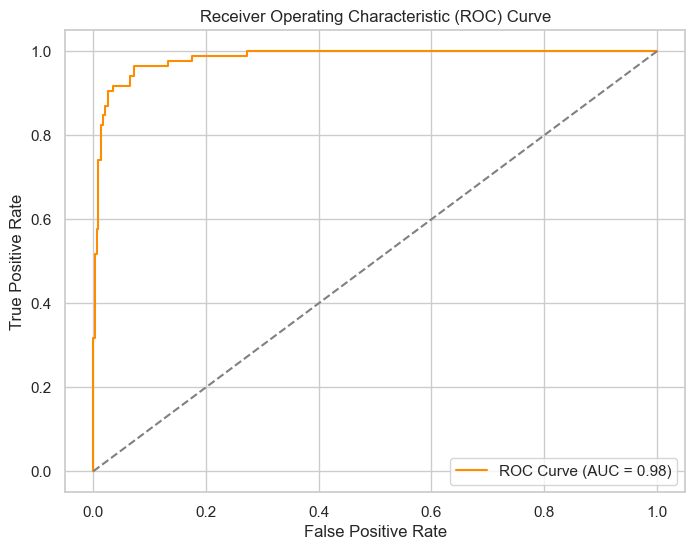

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
import seaborn as sns

# Convert y_test to numpy array if it's a Series
y_test_np = y_test.values if hasattr(y_test, "values") else y_test

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_np, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



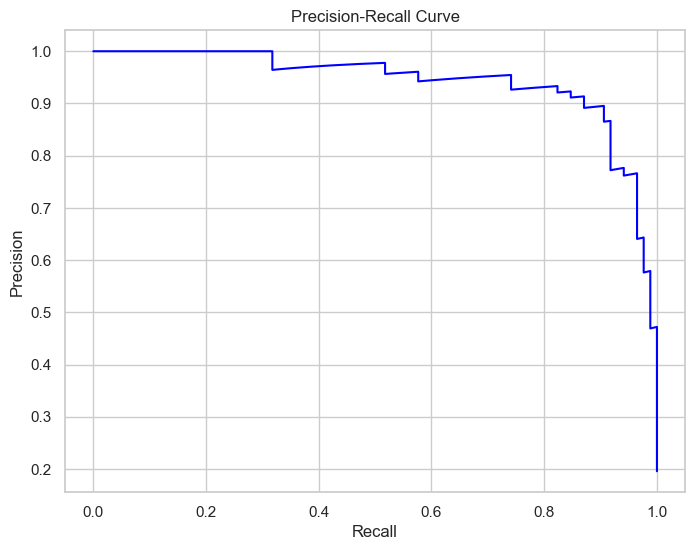

In [55]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_np, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()



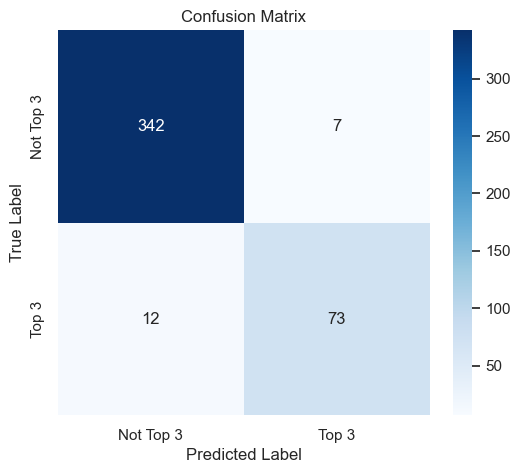

In [56]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Top 3', 'Top 3'],
            yticklabels=['Not Top 3', 'Top 3'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()



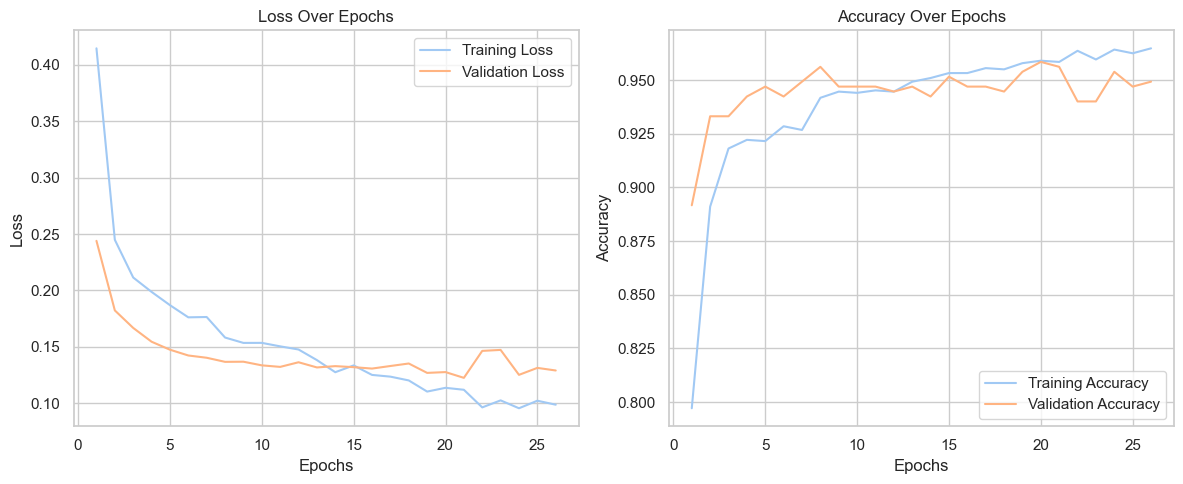

In [57]:
# Loss and Accuracy Curves
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


9.4 Saving the model

In [58]:
# Save trained model
model.save("f1_top3_model.keras")

# Save preprocessor
import joblib
joblib.dump(preprocessor, "preprocessor.joblib")

# Save feature list
with open("feature_list.txt", "w") as f:
    f.write(",".join(X.columns))


In [59]:
import joblib, tensorflow as tf
preprocessor = joblib.load("preprocessor.joblib")
model = tf.keras.models.load_model("f1_top3_model.keras")


9.5 Predicting the results for 2025 Australian GP 

In [60]:
import pandas as pd

data = [
    (1, "Lando Norris", "McLaren"),
    (2, "Oscar Piastri", "McLaren"),
    (3, "Max Verstappen", "Red Bull Racing"),
    (4, "George Russell", "Mercedes"),
    (5, "Yuki Tsunoda", "Racing Bulls"),
    (6, "Alexander Albon", "Williams"),
    (7, "Charles Leclerc", "Ferrari"),
    (8, "Lewis Hamilton", "Ferrari"),
    (9, "Pierre Gasly", "Alpine"),
    (10, "Carlos Sainz", "Williams"),
    (11, "Isack Hadjar", "Racing Bulls"),
    (12, "Fernando Alonso", "Aston Martin"),
    (13, "Lance Stroll", "Aston Martin"),
    (14, "Jack Doohan", "Alpine"),
    (15, "Gabriel Bortoleto", "Kick Sauber"),
    (16, "Kimi Antonelli", "Mercedes"),
    (17, "Nico Hulkenberg", "Kick Sauber"),
    (18, "Liam Lawson", "Red Bull Racing"),
    (19, "Esteban Ocon", "Haas"),
    (20, "Oliver Bearman", "Haas")  # DNS but included
]

df = pd.DataFrame(data, columns=["quali_pos", "driver", "constructor"])

# Add remaining features for model
df["GP_name"] = "Albert Park Grand Prix Circuit"
df["driver_confidence"] = df["quali_pos"].apply(lambda x: 0.95 if x <= 3 else 0.9)
df["constructor_reliability"] = 0.9
df["active_driver"] = 1
df["active_constructor"] = 1


In [61]:
expected_features = [
    'GP_name', 'quali_pos', 'constructor', 'driver',
    'driver_confidence', 'constructor_reliability',
    'active_driver', 'active_constructor'
]

X = df[expected_features]

# Transform and Predict
X_proc = preprocessor.transform(X)
probs = model.predict(X_proc.toarray()).flatten()

# Store predictions
df["top3_probability"] = probs
df["predicted_top3"] = (probs > 0.5).astype(int)

# Show Top 3
top3 = df.sort_values(by="top3_probability", ascending=False).head(3)
print(top3[["quali_pos", "driver", "constructor", "top3_probability"]])


1/1 [==============================] - 0s 65ms/step
   quali_pos          driver      constructor  top3_probability
0          1    Lando Norris          McLaren          0.984543
1          2   Oscar Piastri          McLaren          0.959403
2          3  Max Verstappen  Red Bull Racing          0.855784


9.6 Predicting the results for 2025 Chinese GP 

In [62]:
import pandas as pd

# Cleaned driver-qualifying data from Chinese GP 2025
data = [
    (1, "Oscar Piastri", "McLaren"),
    (2, "George Russell", "Mercedes"),
    (3, "Lando Norris", "McLaren"),
    (4, "Max Verstappen", "Red Bull Racing"),
    (5, "Lewis Hamilton", "Ferrari"),
    (6, "Charles Leclerc", "Ferrari"),
    (7, "Isack Hadjar", "Racing Bulls"),
    (8, "Kimi Antonelli", "Mercedes"),
    (9, "Yuki Tsunoda", "Racing Bulls"),
    (10, "Alexander Albon", "Williams"),
    (11, "Esteban Ocon", "Haas"),
    (12, "Nico Hulkenberg", "Kick Sauber"),
    (13, "Fernando Alonso", "Aston Martin"),
    (14, "Lance Stroll", "Aston Martin"),
    (15, "Carlos Sainz", "Williams"),
    (16, "Pierre Gasly", "Alpine"),
    (17, "Oliver Bearman", "Haas"),
    (18, "Jack Doohan", "Alpine"),
    (19, "Gabriel Bortoleto", "Kick Sauber"),
    (20, "Liam Lawson", "Red Bull Racing")
]

df = pd.DataFrame(data, columns=["quali_pos", "driver", "constructor"])

# Add remaining model-required features
df["GP_name"] = "Shanghai International Circuit"
df["driver_confidence"] = df["quali_pos"].apply(lambda x: 0.95 if x <= 3 else 0.9)
df["constructor_reliability"] = 0.9
df["active_driver"] = 1
df["active_constructor"] = 1


In [63]:
expected_features = [
    'GP_name', 'quali_pos', 'constructor', 'driver',
    'driver_confidence', 'constructor_reliability',
    'active_driver', 'active_constructor'
]

X = df[expected_features]

# Load model & preprocessor
import joblib
import tensorflow as tf

preprocessor = joblib.load("preprocessor.joblib")
model = tf.keras.models.load_model("f1_top3_model.keras")

# Transform & predict
X_proc = preprocessor.transform(X)
probs = model.predict(X_proc.toarray()).flatten()

df["top3_probability"] = probs
df["predicted_top3"] = (probs > 0.5).astype(int)

# Show top 3
top3 = df.sort_values("top3_probability", ascending=False).head(3)
print(top3[["quali_pos", "driver", "constructor", "top3_probability"]])


1/1 [==============================] - 0s 46ms/step
   quali_pos          driver constructor  top3_probability
0          1   Oscar Piastri     McLaren          0.998633
2          3    Lando Norris     McLaren          0.794657
1          2  George Russell    Mercedes          0.721367
